## Overview ##

This notebook begins exploratory data analysis on the [Heart Disease UCI dataset on Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).  

## Set up steps

#### Import relevant Python libraries

In [283]:
#import libaries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Import heart data into a dataframe

In [284]:
heart_data = pd.read_csv("data/heart.csv")

## Examine the Data

#### Preview the data and get basic information

**[Some background facts about heart disease:](https://towardsdatascience.com/heart-disease-prediction-73468d630cfc)**

It is difficult to identify heart disease because of several contributory risk factors.

Those factors include diabetes, high blood pressure, high cholesterol, abnormal pulse rate, and many other factors.

In [285]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [286]:
heart_data.info()
#this dataset has 33 rows and 14 columns, most values are integer data types and the remaining is float values

#additionally, there are 3 types of data:
#Continuous (#): which is quantitative data that can be measured
#Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)
#Binary Data: data whose unit can take on only two possible states ( 0 &1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Search for missing values

In [287]:
missing_values_count = heart_data.isnull().sum()
missing_values_count
#There are no missing values in any of the columns

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Search for inconsistency in the way the data is entered and view the distribution ####

Key questions:

1. Is the data within each column entered consistently?  
2. How is the data in each column distributed? (plot the data)

For each variable, the following steps are taken:
1. list relevant interesting facts, often with a link to more information
2. list the range of values using the .unique() method
3. plot the distribution of values with a Seaborn histogram
4. if needed, sort the values to identify the high/low values using the .sort_values() method
5. if needed, assign the values to a meaningful category (ex: healthy vs. high blood pressure) using the binning method
6. if needed, calculate the percentage of values in each category and plot the percents using a Matplot Lib pie chart

<u>**Age**</u>

**Some interesting facts about the age variable:**

Age is the most important risk factor in developing cardiovascular or heart diseases.

Coronary fatty streaks can begin to form in adolescence and heart disease risk triples with each decade of life. 

It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. 

Simultaneously, the risk of stroke doubles every decade after age 55.

In [288]:
#identify what ages are in the dataset
age = heart_data['age'].unique()
age

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

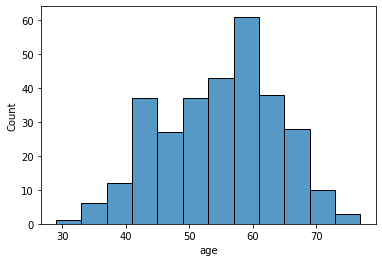

In [289]:
#plot the distribution
g  = sns.histplot(data=heart_data, x="age")
g.figure.savefig('images/AgeDistr')


In [290]:
#sort the data to identify the min and max age
heart_data["age"].sort_values()

72     29
58     34
125    34
239    35
65     35
       ..
60     71
151    71
129    74
144    76
238    77
Name: age, Length: 303, dtype: int64

**Question: What percentage of each age group are there in the dataset?**

In [291]:
# Bin the Age column
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ["20s", "30s", "40s", "50s", "60s", "70s"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["age_group"] = pd.cut(heart_data["age"], age_bins, labels=age_labels)

#count the number of patients in each age group
print(heart_data.value_counts('age_group'))

#calculate the percentage of patients in each age group
age_percents = (heart_data.value_counts('age_group') / heart_data['age'].count()) * 100
age_percents


age_group
50s    129
40s     76
60s     73
30s     18
70s      6
20s      1
dtype: int64


age_group
50s    42.574257
40s    25.082508
60s    24.092409
30s     5.940594
70s     1.980198
20s     0.330033
dtype: float64

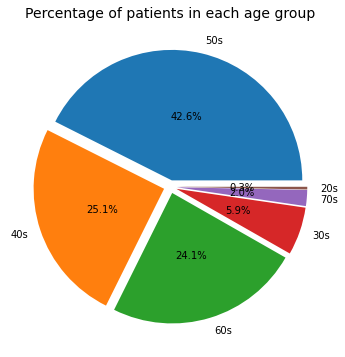

In [292]:
#plot the age percentages using matplotlib (pie charts aren't available in Seaborn)
pie, ax = plt.subplots(figsize=[10,6])
labels = age_percents.keys()
plt.pie(x=age_percents, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients in each age group", fontsize=14);
pie.savefig("images/AgePercents.png")

<u>**Gender**</u> 

**Some interesting facts about the gender variable:**

Men are at greater risk of heart disease than pre-menopausal women. 

Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. 

If a woman has diabetes, she is more likely to develop heart disease than a man with diabetes.

In [293]:
#examine how gender is noted in the dataset
gender = heart_data['sex'].unique()
gender
#dataset documentation explains that: 1 = male, 0 = female

array([1, 0], dtype=int64)

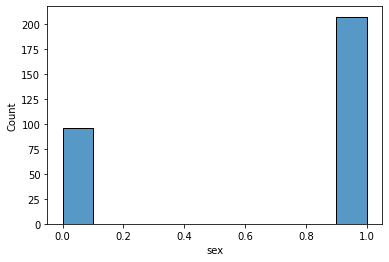

In [294]:
#plot the distribution
g = sns.histplot(data=heart_data, x="sex")
g.figure.savefig('images/GenderDistr')
#there are twice as many men in this dataset than women

In [295]:
# Bin the Gender column
gender_bins = [-1, 0, 1]
gender_labels = ["female", "male"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["gender"] = pd.cut(heart_data["sex"], gender_bins, labels=gender_labels)

#count the number of patients in each  group
print(heart_data.value_counts('gender'))

#calculate the percentage of patients in each group
gender_percents = (heart_data.value_counts('gender') / heart_data['sex'].count()) * 100
gender_percents


gender
male      207
female     96
dtype: int64


gender
male      68.316832
female    31.683168
dtype: float64

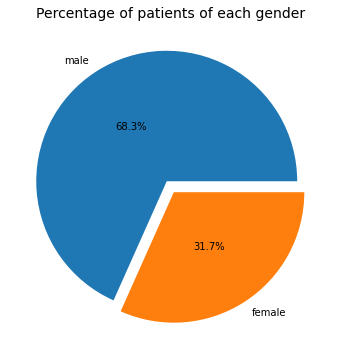

In [296]:
#plot the gender percentages using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = gender_percents.keys()
plt.pie(x=gender_percents, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients of each gender", fontsize=14);
pie.savefig("images/GenderPercents.png")

<u>**Chest Pain**</u> 

In the dataset, chest pain type displays the type of chest-pain experienced by the individual using the following format:

0. no chest pain
1. typical angina
2. atypical angina
3. non-anginal pain
4. asymptotic

In [297]:
#examine how chest pain is noted in the dataset
chest_pain_type = heart_data['cp'].value_counts()
chest_pain_type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

These values aren't making since because the documentation lists 1 - 4.

In [298]:
#sort the data to examine it further
heart_data["cp"].sort_values()

151    0
96     0
97     0
211    0
209    0
      ..
117    3
101    3
259    3
286    3
0      3
Name: cp, Length: 303, dtype: int64

Internet research and reviewing [other developer's analysis](https://coderkian.com/week-3-exploratory-data-analysis-on-heart-disease-dataset-kaggle/) of this dataset reveals that a "0" value is interpreted as no chest pain.

Therefore, this dataset is showing 143 patients with no chest pain and no patients who have the 4 -'asymptomatic' value.

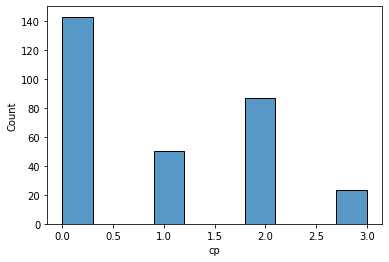

In [299]:
#plot the distribution
g = sns.histplot(data=heart_data, x="cp")
g.figure.savefig('images/ChestPainDistr')

**Question: What percentage of each chest pain type group are there in the dataset?**

In [300]:
# Bin the Chest Pain Type column
cp_bins = [-1, 0, 1, 2, 3, 4]
cp_labels = ["no pain", "typical angina", "atypical angina", "non-anginal pain", "asymptotic"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["chest_pain_type"] = pd.cut(heart_data["cp"], cp_bins, labels=cp_labels)

#count the number of patients in each group
print(heart_data.value_counts('chest_pain_type'))

#calculate the percentage of patients in each group
cp_percents = (heart_data.value_counts('chest_pain_type') / heart_data['cp'].count()) * 100
cp_percents

chest_pain_type
no pain             143
atypical angina      87
typical angina       50
non-anginal pain     23
asymptotic            0
dtype: int64


chest_pain_type
no pain             47.194719
atypical angina     28.712871
typical angina      16.501650
non-anginal pain     7.590759
asymptotic           0.000000
dtype: float64

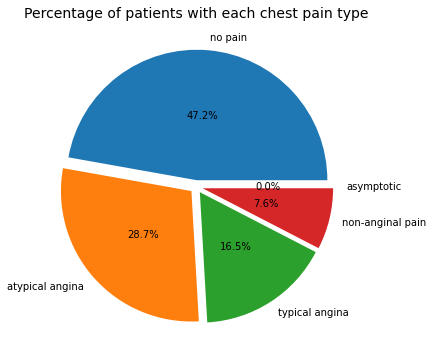

In [301]:
#plot the chest pain type percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = cp_percents.keys()
plt.pie(x=cp_percents, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each chest pain type", fontsize=14);
pie.savefig("images/ChestPainType.png")

<u>**Resting Blood Pressure**</u> 

Resting Blood Pressure displays the resting blood pressure value of an individual in mmHg (unit) on admission to the hospital.

**[Some interesting facts about blood pressure readings](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982)**

Your total blood pressure reading is determined by measuring your systolic and diastolic blood pressures. 

Systolic blood pressure, the top number, measures the force your heart exerts on the walls of your arteries each time it beats. 

Diastolic blood pressure, the bottom number, measures the force your heart exerts on the walls of your arteries in between beats.

Blood pressure readings fall into four general categories, ranging from normal to stage 2 high blood pressure (hypertension).

| Top number (systolic) in mm HG   | And/or | Bottom number (diastolic) in mm Hg | Category |
| --- | --- | --- | --- |              
| Below 120     | and     | Below 80      | Normal blood pressure                       |
| 120-129       | and     | Below 80      | Elevated blood pressure                     |
| 130-139       | or      | 80-89         | Stage 1 high blood pressure (hypertension)  |
| 140 or higher | or      | 90 or higher  | Stage 2 high blood pressure (hypertension)  |

If you are an adult with a 10 percent or higher risk of developing cardiovascular disease in the next 10 years, or if you have chronic kidney disease, diabetes or coronary artery disease, your treatment goal is less than 130/80 mm Hg. 

If you're a healthy adult age 65 or older, your treatment goal is also less than 130/80 mm Hg.

In [302]:
resting_blood_pressure = heart_data['trestbps'].unique()
resting_blood_pressure

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

*These must be systolic (top number) blood pressure values.*

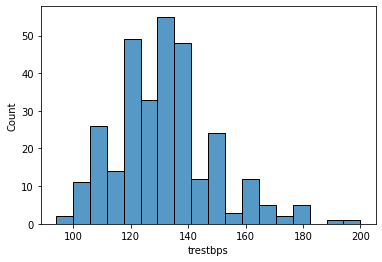

In [303]:
#plot the distribution
g = sns.histplot(data=heart_data, x="trestbps")
g.figure.savefig('images/BPDistr')

**Question: What percentage of each resting blood pressure category are there in the dataset?**

In [304]:
# Bin the resting blood pressure column
rbp_bins = [0, 119, 129, 139, 300]
rbp_labels = ["normal", "elevated", "stage 1 high", "stage 2 high"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["rbp_category"] = pd.cut(heart_data["trestbps"], rbp_bins, labels=rbp_labels)

#count the number of patients in each group
print(heart_data.value_counts('rbp_category'))

#calculate the percentage of patients in each group
rbp_percents = (heart_data.value_counts('rbp_category') / heart_data['trestbps'].count()) * 100
rbp_percents

rbp_category
stage 2 high    97
elevated        75
stage 1 high    71
normal          60
dtype: int64


rbp_category
stage 2 high    32.013201
elevated        24.752475
stage 1 high    23.432343
normal          19.801980
dtype: float64

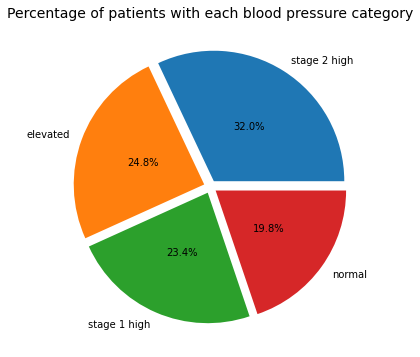

In [305]:
#plot the blood pressure category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = rbp_percents.keys()
plt.pie(x=rbp_percents, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each blood pressure category", fontsize=14);
pie.savefig("images/BloodPressureCategory.png")

<u>**Cholestoral**</u>

Serum Cholestrol displays the serum cholesterol in mg/dl (unit)

**[Some interesting facts about cholestrol](https://www.healthline.com/health/serum-cholesterol#results)**

Cholesterol is often associated with heart disease because can build up in your arteries and restrict or block blood flow.

Measuring your LDL (“bad” cholesterol), HDL (“good” cholesterol), and triglycerides will give you a number called your total blood cholesterol, or serum cholesterol. 

Your serum cholesterol levels can help your doctor figure out your risk for developing heart disease in the next 10 years.

Lab reports will show serum cholesterol levels in milligrams per deciliter (mg/dL).

| [category](https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/diagnosis-treatment/drc-20350806) | serum cholestrol level |
| --- | --- | 
| Healthy | less than 200 mg/dL |
| Borderline high | 200-239 mg/dL |
| High | 240 mg/dL and above |

In [306]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,gender,chest_pain_type,rbp_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60s,male,non-anginal pain,stage 2 high
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30s,male,atypical angina,stage 1 high
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40s,female,typical angina,stage 1 high
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50s,male,typical angina,elevated
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50s,female,no pain,elevated


In [307]:
cholesterol = heart_data['chol'].unique()
cholesterol

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

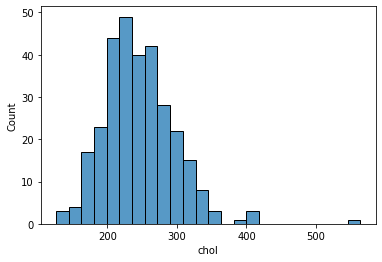

In [308]:
#plot the distribution
g = sns.histplot(data=heart_data, x="chol")
g.figure.savefig('images/CholDistr')

**Question: What percentage of each cholestrol category are there in the dataset?**

In [309]:
#sort the data to get the range
heart_data["chol"].sort_values()

111    126
301    131
53     141
151    149
267    149
      ... 
96     394
220    407
246    409
28     417
85     564
Name: chol, Length: 303, dtype: int64

In [310]:
# Bin the cholestrol column
chol_bins = [0, 199, 239, 600]
chol_labels = ["healthy", "borderline high", "high"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["chol_level"] = pd.cut(heart_data["chol"], chol_bins, labels=chol_labels)

#count the number of patients in each group
print(heart_data.value_counts('chol_level'))

#calculate the percentage of patients in each group
chol_percents = (heart_data.value_counts('chol_level') / heart_data['chol'].count()) * 100
chol_percents

chol_level
high               155
borderline high     98
healthy             50
dtype: int64


chol_level
high               51.155116
borderline high    32.343234
healthy            16.501650
dtype: float64

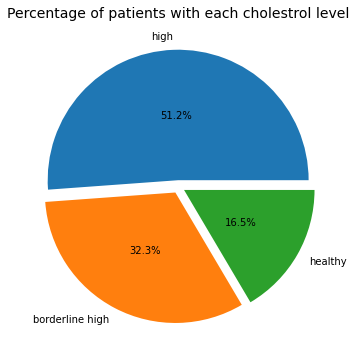

In [311]:
#plot the cholesterol category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = chol_percents.keys()
plt.pie(x=chol_percents, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each cholestrol level", fontsize=14);
pie.savefig("images/CholestrolLevel.png")

<u>**Fasting Blood Sugar**</u>

Fasting Blood Sugar compares the fasting blood sugar value of an individual with 120mg/dl.

1 (true) - fasting blood sugar is greater than 120mg/dl

0 (false) - fasting blood sugar is less than 120mg/dl

**some interesting facts about fasting blood sugar**

A normal fasting blood sugar level is 100 or less. 

Prediabetes is a fasting blood sugar of 101 to 125. 

A fasting blood sugar of 126 or greater indicates diabetes.

In [312]:
blood_sugar = heart_data['fbs'].value_counts()
blood_sugar

0    258
1     45
Name: fbs, dtype: int64

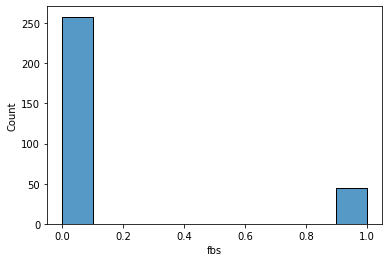

In [313]:
#plot the distribution
g = sns.histplot(data=heart_data, x="fbs")
g.figure.savefig('images/BloodSugarDistr')

In [314]:
# Bin the blood sugar column
fbs_bins = [-1, 0, 1]
fbs_labels = ["normal/prediabetes", "prediabetes/diabetes"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["bloodsugar_level"] = pd.cut(heart_data["fbs"], fbs_bins, labels=fbs_labels)

#count the number of patients in each group
print(heart_data.value_counts('bloodsugar_level'))

#calculate the percentage of patients in each group
fbs_percents = (heart_data.value_counts('bloodsugar_level') / heart_data['fbs'].count()) * 100
fbs_percents

bloodsugar_level
normal/prediabetes      258
prediabetes/diabetes     45
dtype: int64


bloodsugar_level
normal/prediabetes      85.148515
prediabetes/diabetes    14.851485
dtype: float64

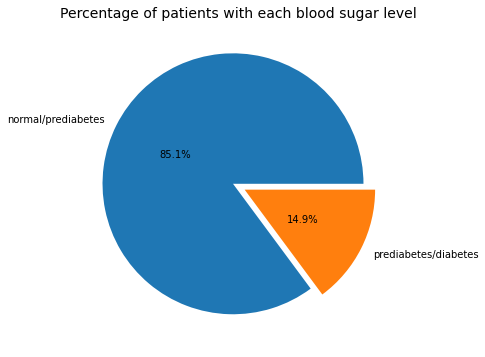

In [315]:
#plot the blood sugar level percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = fbs_percents.keys()
plt.pie(x=fbs_percents, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each blood sugar level", fontsize=14);
pie.savefig("images/BloodSugarLevel.png")

<u>**Resting ECG**</u>

Resting ECG displays resting electrocardiographic results

0 = normal

1 = having ST-T wave abnormality

2 = left ventricular hyperthrophy

**some interesting facts about ECG results**

An electrocardiogram records the electrical signals in your heart. 

It's a common and painless test used to quickly detect heart problems and monitor your heart's health.

[ST-T wave abnormalities](https://www.medhelp.org/posts/Heart-Disease/ST--T-wave-abnormality--consider-anterior-ischemia/show/788679#:~:text=ST%20%26%20T%20wave%20abnormality%2C%20consider%20anterior%20ischemia.,aren%27t%20having%20any%20chest%20pain%20or%20any%20shortness) are nonspecific findings found on an EKG which may represent areas of low blood flow to the heart.

[Left ventricular hyperthrophy](https://www.reference.com/world-view/causes-non-specific-st-t-wave-abnormalities-89255a4c3e7e27e8) is normally caused by high blood pressure and also the enlargement of the ventricle.

In [316]:
ecg = heart_data['restecg'].value_counts()
ecg

1    152
0    147
2      4
Name: restecg, dtype: int64

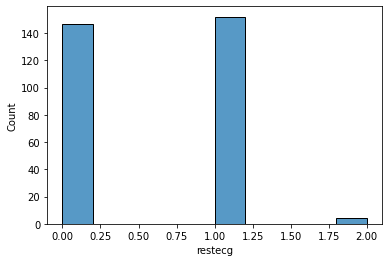

In [317]:
#plot the distribution
g = sns.histplot(data=heart_data, x="restecg")
g.figure.savefig('images/ECGDistr')

In [318]:
# Bin the ECG column
ecg_bins = [-1, 0, 1, 2]
ecg_labels = ["normal", "ST-T wave abnormality", "left ventricular hyperthrophy"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["ecg_level"] = pd.cut(heart_data["restecg"], ecg_bins, labels=ecg_labels)

#count the number of patients in each group
print(heart_data.value_counts('ecg_level'))

#calculate the percentage of patients in each group
ecg_percents = (heart_data.value_counts('ecg_level') / heart_data['restecg'].count()) * 100
ecg_percents

ecg_level
ST-T wave abnormality            152
normal                           147
left ventricular hyperthrophy      4
dtype: int64


ecg_level
ST-T wave abnormality            50.165017
normal                           48.514851
left ventricular hyperthrophy     1.320132
dtype: float64

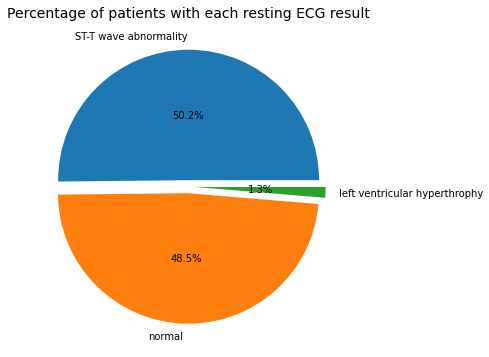

In [319]:
#plot the cholesterol category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = ecg_percents.keys()
plt.pie(x=ecg_percents, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each resting ECG result", fontsize=14);
pie.savefig("images/RestingECG.png")

<u> **Maximum Heart Rate Achieved** </u>

Max heart rate achieved displays the max heart rate achieved by an individual.

**some interesting facts about maximum heart rate achieved**

[The maximum heart rate is, on average, the highest your pulse can get.](https://www.webmd.com/heart-disease/heart-failure/qa/what-is-your-maximum-heart-rate) 

To calculate your predicted maximum heart rate, use this formula:

220 - Your Age = Predicted Maximum Heart Rate.

For example, a 40-year-old's predicted maximum heart rate is about 180 beats per minute.

[The increase in cardiovascular risk](https://towardsdatascience.com/heart-disease-prediction-73468d630cfc), associated with the acceleration of heart rate, is comparable to the increase in risk observed with high blood pressure. 

It has been shown that an increase in heart rate by 10 beats per minute is associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

In [320]:
max_heart_rate = heart_data['thalach'].unique()
max_heart_rate

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

For this variable, maximum heart rate is compared with age in order to assign a level to it

In [321]:
#this For Loop creates a list called normal_max_rate; this is the target maximum heart rate for each patient's age

normal_max_rate = []

for value in heart_data["age"]:
    normal_max_rate.append(200 - value)

#the target max heart rate is added as a column to the heart dataframe
heart_data['normal_max_rate'] = normal_max_rate

#an additional column called 'max_heartrate_level' is created
#this is the patient's heart rate compared with their target max heart rate
#if the patient's max heart rate is higher than the target for their age, their level is listed as 'high'
#if the patient's max heart rate is equal to or lower than the target for their age, their level is listed as 'target'
heart_data['max_heartrate_level'] = np.where(heart_data['thalach']>heart_data['normal_max_rate'],'high','target')

#here is the heart dataframe with those columns added
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,age_group,gender,chest_pain_type,rbp_category,chol_level,bloodsugar_level,ecg_level,normal_max_rate,max_heartrate_level
0,63,1,3,145,233,1,0,150,0,2.3,...,1,60s,male,non-anginal pain,stage 2 high,borderline high,prediabetes/diabetes,normal,137,high
1,37,1,2,130,250,0,1,187,0,3.5,...,1,30s,male,atypical angina,stage 1 high,high,normal/prediabetes,ST-T wave abnormality,163,high
2,41,0,1,130,204,0,0,172,0,1.4,...,1,40s,female,typical angina,stage 1 high,borderline high,normal/prediabetes,normal,159,high
3,56,1,1,120,236,0,1,178,0,0.8,...,1,50s,male,typical angina,elevated,borderline high,normal/prediabetes,ST-T wave abnormality,144,high
4,57,0,0,120,354,0,1,163,1,0.6,...,1,50s,female,no pain,elevated,high,normal/prediabetes,ST-T wave abnormality,143,high


In [322]:
#this is the counts of patients with high vs. target max heart rate
heart_data["max_heartrate_level"].value_counts()

high      188
target    115
Name: max_heartrate_level, dtype: int64

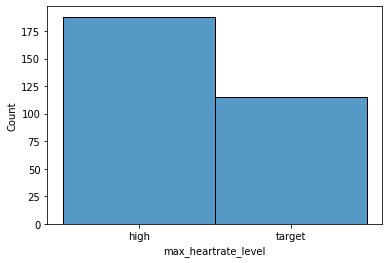

In [323]:
#plot the distribution
g = sns.histplot(data=heart_data, x="max_heartrate_level")
g.figure.savefig('images/MaxHRDistr')

In [324]:
#calculate the percentage of patients in each group
maxrate_percents = (heart_data.value_counts('max_heartrate_level') / heart_data['thalach'].count()) * 100
maxrate_percents

max_heartrate_level
high      62.046205
target    37.953795
dtype: float64

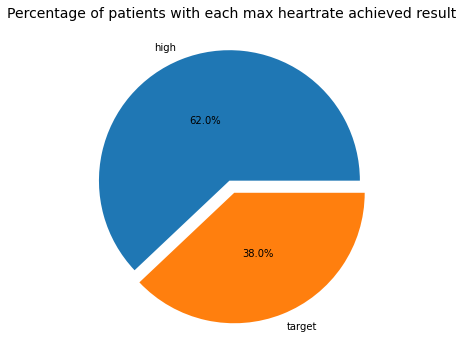

In [325]:
#plot the max heart rate percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = maxrate_percents.keys()
plt.pie(x=maxrate_percents, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each max heartrate achieved result", fontsize=14);
pie.savefig("images/MaxRate.png")

<u> **Exercise Induced Angina** </u>

Whether the patient has exercise induced angina.

1 = yes; 0 = no

**[some interesting facts about exercise induced angina](https://rehabilitateyourheart.wordpress.com/2013/01/16/exercise-induced-angina/#:~:text=This%20is%20known%20as%20exercise%20induced%20angina.%20Angina,can%20be%20caused%20by%20blockage%2C%20injury%20or%20spasms.)**

Exercise induced angina is chest discomfort with activity.

Angina is generally caused from not getting enough blood through the arteries to supply the walls of the heart with enough blood flow to adequately pump. 

Angina can be caused by blockage, injury or spasms. 


In [326]:
exercise_angina = heart_data['exang'].value_counts()
exercise_angina

0    204
1     99
Name: exang, dtype: int64

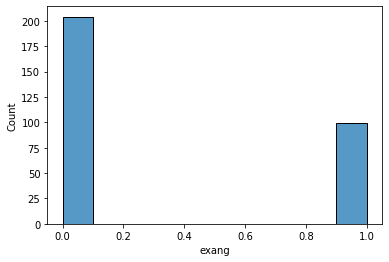

In [327]:
#plot the distribution
g = sns.histplot(data=heart_data, x="exang")
g.figure.savefig('images/ExerAngDistr')

In [328]:
# Bin the Exercise Induced Angina column
ang_bins = [-1, 0, 1]
ang_labels = ["no", "yes"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["angina"] = pd.cut(heart_data["exang"], ang_bins, labels=ang_labels)

#count the number of patients in each group
print(heart_data.value_counts('angina'))

#calculate the percentage of patients in each group
ang_percents = (heart_data.value_counts('angina') / heart_data['exang'].count()) * 100
ang_percents

angina
no     204
yes     99
dtype: int64


angina
no     67.326733
yes    32.673267
dtype: float64

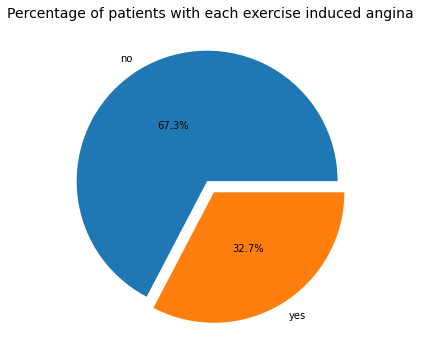

In [329]:
#plot the cholesterol category percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = ang_percents.keys()
plt.pie(x=ang_percents, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each exercise induced angina", fontsize=14);
pie.savefig("images/angina.png")

<u> **Old Peak (ST Depression)** </u>

ST depression induced by exercise relative to rest.

**[some interesting facts about exercise induced angina](https://en.wikipedia.org/wiki/ST_depression#Measurement)**

ST depression refers to a finding on an electrocardiogram, where the trace in the ST segment is abnormally low below the baseline.

High ST depression is considered normal & healthy. 

People with significant ST Depression findings are at greater risk for heart disease.

It is significant if it is more than 1 mm in V5-V6, or 1.5 mm in AVF or III.

In a cardiac stress test, an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia.

An exercise stress test requires an ST depression of at least 2 mm to significantly indicate reversible ischaemia.


In [330]:
st_depression = heart_data['oldpeak'].unique()
st_depression

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

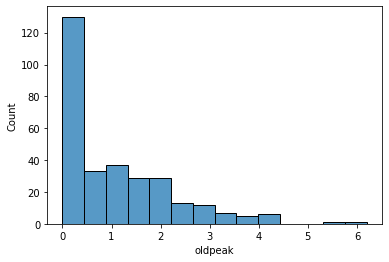

In [331]:
#plot the distribution
g = sns.histplot(data=heart_data, x="oldpeak")
g.figure.savefig('images/STDeprDistr')

In [332]:
#sort the data to get the range
heart_data["oldpeak"].sort_values()

302    0.0
219    0.0
113    0.0
114    0.0
115    0.0
      ... 
250    4.2
101    4.2
291    4.4
221    5.6
204    6.2
Name: oldpeak, Length: 303, dtype: float64

In [333]:
# Bin the Old Peak (ST Depression) column
oldpeak_bins = [0, 1, 1.5, 2, 7]
oldpeak_labels = ["not significant", "significant (V5-V6)", "significant (AVF or III)", "reversible ischaemia"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["st_depression"] = pd.cut(heart_data["oldpeak"], oldpeak_bins, labels=oldpeak_labels)

#count the number of patients in each group
print(heart_data.value_counts('st_depression'))

#calculate the percentage of patients in each group
oldpeak_percents = (heart_data.value_counts('st_depression') / heart_data['oldpeak'].count()) * 100
oldpeak_percents

st_depression
not significant             81
reversible ischaemia        50
significant (V5-V6)         38
significant (AVF or III)    35
dtype: int64


st_depression
not significant             26.732673
reversible ischaemia        16.501650
significant (V5-V6)         12.541254
significant (AVF or III)    11.551155
dtype: float64

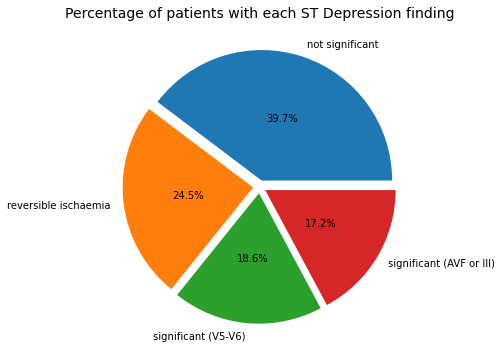

In [334]:
#plot the percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = oldpeak_percents.keys()
plt.pie(x=oldpeak_percents, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each ST Depression finding", fontsize=14);
pie.savefig("images/STDepression.png")

In [335]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  303 non-null    int64   
 1   sex                  303 non-null    int64   
 2   cp                   303 non-null    int64   
 3   trestbps             303 non-null    int64   
 4   chol                 303 non-null    int64   
 5   fbs                  303 non-null    int64   
 6   restecg              303 non-null    int64   
 7   thalach              303 non-null    int64   
 8   exang                303 non-null    int64   
 9   oldpeak              303 non-null    float64 
 10  slope                303 non-null    int64   
 11  ca                   303 non-null    int64   
 12  thal                 303 non-null    int64   
 13  target               303 non-null    int64   
 14  age_group            303 non-null    category
 15  gender               30

<u> **Slope** </u>

The slope of the peak exercise ST segment

**[some interesting facts about ST Depression Slope](https://en.my-ekg.com/how-read-ekg/st-segment.html)**

The ST-segment, in normal conditions, is flat or isoelectric, although small variations up to 0.5 mm may be present.

The “slope” refers to the peak exercise ST segment with the following values: 

0: upsloping

1: flat

2: downsloping

The most important cause of ST-segment abnormalities (elevation or depression) is myocardial ischemia.

An electrical disturbance is originated in the myocardial tissue when a heart region is suffering from an important persistent ischemia, causing the ST-segment to shift on the EKG.

It will shift in either a upslope or a downslope, depending on the degree of coronary artery occlusion.


In [336]:
st_slope = heart_data['slope'].value_counts()
st_slope

2    142
1    140
0     21
Name: slope, dtype: int64

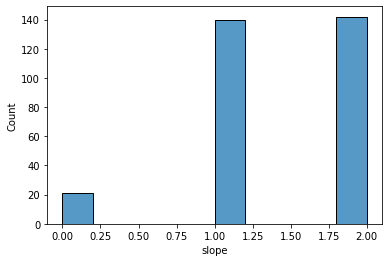

In [337]:
#plot the distribution
g = sns.histplot(data=heart_data, x="slope")
g.figure.savefig('images/SlopeDistr')

In [338]:
#create a dictionary of slope values and labels
slope_values = {0: 'upsloping', 1: 'flat', 2: 'downsloping'}

#map that to the slope column
heart_data['slope_type'] = heart_data['slope'].map(slope_values)
heart_data['slope_type'].value_counts()

downsloping    142
flat           140
upsloping       21
Name: slope_type, dtype: int64

In [339]:
#calculate the percentage of patients in each group
slope_percents = (heart_data.value_counts('slope_type') / heart_data['slope_type'].count()) * 100
slope_percents

slope_type
downsloping    46.864686
flat           46.204620
upsloping       6.930693
dtype: float64

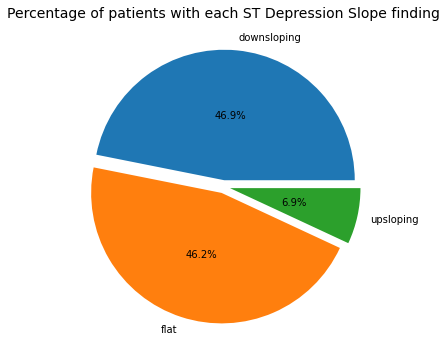

In [340]:
#plot the percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = slope_percents.keys()
plt.pie(x=slope_percents, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each ST Depression Slope finding", fontsize=14);
pie.savefig("images/Slope.png")

<u> **CA** </u>

CA refers to the number of major vessels (0-3) colored by fluorosopy

[Fluoroscopy](https://www.urmc.rochester.edu/encyclopedia/content.aspx?ContentTypeID=92&ContentID=p07662) is a type of medical imaging that shows a continuous X-ray image on a monitor, much like an X-ray movie. 

It is used to study cardiac motion and to help the healthcare provider see the flow of blood through the coronary arteries to check for arterial blockages.

In [341]:
heart_data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

The documentation suggests the data will show values from 0 - 3.  

But values from 0 - 4 are present. It is unclear what this means or the positivity/negativity of each value.

I wonder if 0 actually means the patient didn't have a this test, because a majority of the patients have this value.

It doesn't make sense that the test showed no major vessels...but perhaps this will be explained more in the correlational studies later in this project.

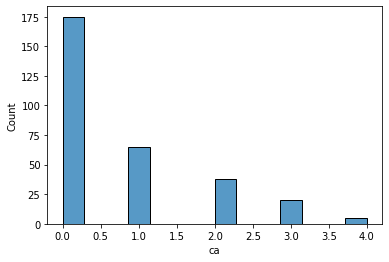

In [342]:
#plot the distribution
g = sns.histplot(data=heart_data, x="ca")
g.figure.savefig('images/CADistr')

In [343]:
#calculate the percentage of patients in each group
ca_percents = (heart_data.value_counts('ca') / heart_data['ca'].count()) * 100
ca_percents

ca
0    57.755776
1    21.452145
2    12.541254
3     6.600660
4     1.650165
dtype: float64

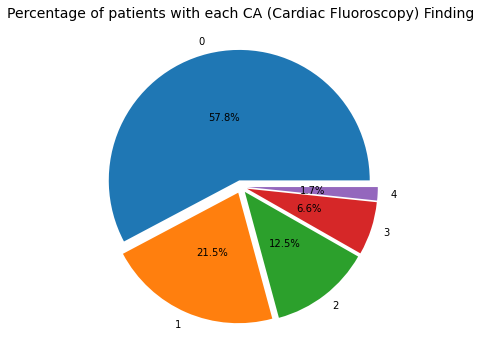

In [344]:
#plot the percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = ca_percents.keys()
plt.pie(x=ca_percents, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each CA (Cardiac Fluoroscopy) Finding", fontsize=14);
pie.savefig("images/CA.png")

<u> **Thalassemia** </u>

Thal displays the thalassemia test finding:
3 = normal
6 = fixed defect
7 = reversible defect

**[some interesting facts about thalassemia](https://www.ahajournals.org/doi/full/10.1161/CIRCHEARTFAILURE.109.913863)**

Thalassemia is an inherited blood disorder resulting in chronic anemia and typically requires life-long transfusion therapy. 

Thalassemia is one of the most common genetic disorders.

People with fixed defect Thalassemia have a higher probability of suffering from heart diseases.

An important issue that has evolved during past decades is the age of onset of heart failure. 

In the 1960s, before the initiation of regular blood transfusions and iron chelation, heart failure occurred as early as during the second decade of life, with an average age of onset of 16 years. After the introduction of systemic therapy, the occurrence of heart failure shifted to 1 decade later. 

Despite the advances in therapeutic management of thalassemia major and the resulting substantial improvement of patients’ survival, heart disease always represented and still remains the primary cause of mortality and a major cause of morbidity.

*note: no information could be located on the meaning of 'reversible defect'.

In [345]:
heart_data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

The documentation suggests that values will be 3, 6, and 7.

It is assumed that:

0 = no thalassemia test was run

1 = normal

2 = fixed defect

3 = reversible defect

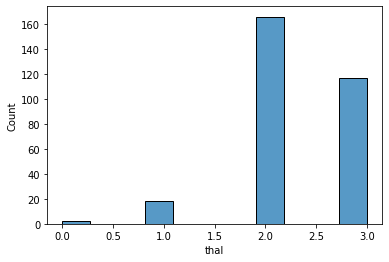

In [346]:
#plot the distribution
g = sns.histplot(data=heart_data, x="thal")
g.figure.savefig('images/ThalDistr')

In [347]:
# Bin the Thalassemia column
thal_bins = [-1, 0, 1, 2, 3]
thal_labels = ["no test", "normal", "fixed defect", "reversible defect"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["thal_result"] = pd.cut(heart_data["thal"], thal_bins, labels=thal_labels)

#count the number of patients in each group
print(heart_data.value_counts('thal_result'))

#calculate the percentage of patients in each group
thal_percents = (heart_data.value_counts('thal_result') / heart_data['thal_result'].count()) * 100
thal_percents

thal_result
fixed defect         166
reversible defect    117
normal                18
no test                2
dtype: int64


thal_result
fixed defect         54.785479
reversible defect    38.613861
normal                5.940594
no test               0.660066
dtype: float64

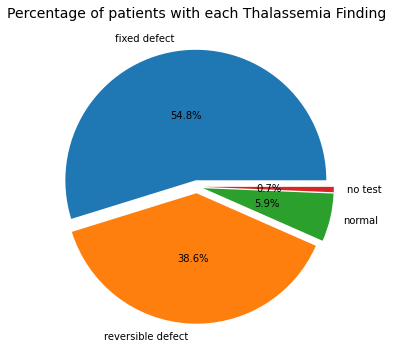

In [348]:
#plot the percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = thal_percents.keys()
plt.pie(x=thal_percents, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with each Thalassemia Finding", fontsize=14);
pie.savefig("images/Thal.png")

<u> **Target** </u>

The Target feature refers to whether the patient has heart disease or not.  

Values are:

0 = absent

1 = present

In [349]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

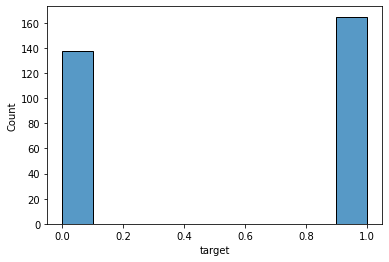

In [350]:
#plot the distribution
g = sns.histplot(data=heart_data, x="target")
g.figure.savefig('images/TargetDistr')

In [351]:
# Bin the Target column
target_bins = [-1, 0, 1]
target_labels = ["disease_absent", "disease_present"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["target_labels"] = pd.cut(heart_data["target"], target_bins, labels=target_labels)

#count the number of patients in each group
print(heart_data.value_counts('target_labels'))

#calculate the percentage of patients in each group
target_percents = (heart_data.value_counts('target_labels') / heart_data['target_labels'].count()) * 100
target_percents

target_labels
disease_present    165
disease_absent     138
dtype: int64


target_labels
disease_present    54.455446
disease_absent     45.544554
dtype: float64

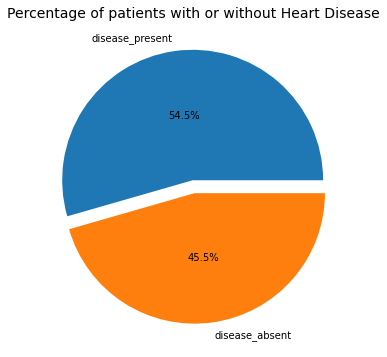

In [352]:
#plot the percentages 
pie, ax = plt.subplots(figsize=[10,6])
labels = target_percents.keys()
plt.pie(x=target_percents, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of patients with or without Heart Disease", fontsize=14);
pie.savefig("images/Target.png")

The updated dataframe with variable labels is saved as a new .csv file and used in the Feature Analysis notebook

In [353]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  303 non-null    int64   
 1   sex                  303 non-null    int64   
 2   cp                   303 non-null    int64   
 3   trestbps             303 non-null    int64   
 4   chol                 303 non-null    int64   
 5   fbs                  303 non-null    int64   
 6   restecg              303 non-null    int64   
 7   thalach              303 non-null    int64   
 8   exang                303 non-null    int64   
 9   oldpeak              303 non-null    float64 
 10  slope                303 non-null    int64   
 11  ca                   303 non-null    int64   
 12  thal                 303 non-null    int64   
 13  target               303 non-null    int64   
 14  age_group            303 non-null    category
 15  gender               30

In [354]:
heart_data.to_csv('data/revised_dataset.csv')